In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\vigne\\Documents\\BigData\\Project\\loan_approval_dataset2.csv")

In [3]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [4]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [8]:
df.replace({"loan_status": {'Rejected' : 0, 'Approved': 1},"education":{'Graduate':0,'Not Graduate':1},"self_employed":{'No':0, 'Yes':1}}, inplace=True)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


Number of people who take a loan group by loan amount term :
loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64


<Axes: xlabel='loan_term', ylabel='count'>

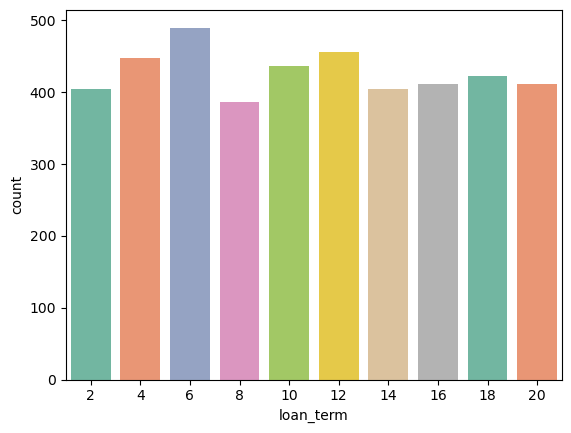

In [9]:
print("Number of people who take a loan group by loan amount term :")
print(df['loan_term'].value_counts())
sns.countplot(x='loan_term', data=df, palette = 'Set2')

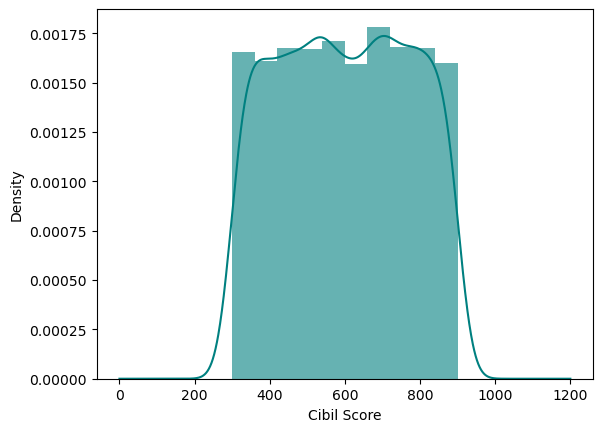

In [10]:
ax = df["cibil_score"].hist(density=True, stacked=True, color='teal', alpha=0.6)
df["cibil_score"].plot(kind='density', color='teal')
ax.set(xlabel='Cibil Score')
plt.show()

In [11]:
A_mean = df['loan_amount'].mean()
B_mean = df['income_annum'].mean()
C_mean = df['loan_status'].mean()
D_mean = df['cibil_score'].mean()
E_mean = df['residential_assets_value'].mean()

a_std = df['loan_amount'].std()
b_std = df['income_annum'].std()
c_std = df['loan_status'].std()
d_std = df['cibil_score'].std()
e_std = df['residential_assets_value'].std()

r = df['loan_amount'].corr(df['income_annum'])
s = df['cibil_score'].corr(df['loan_amount'])
t = df['residential_assets_value'].corr(df['loan_amount'])
u = df['cibil_score'].corr(df['loan_status'])

print("The correlation between Loan Amount and Income is", r)
if r < 0:
    print("This is negatively correlated\n")
elif r == 0:
    print("There is no correlation\n")
elif 0 < r < 1:
    print("There is positively correlated\n")

print("The correlation between Cibil Score and Loan Amount is", s)
if s < 0:
    print("This is negatively correlated\n")
elif s == 0:
    print("There is no correlation\n")
elif 0 < s < 1:
    print("There is positively correlated\n")
    
print("The correlation between Residential asset and Loan Amount is", t)
if t < 0:
    print("This is negatively correlated\n")
elif t == 0:
    print("There is no correlation\n")
elif 0 < t < 1:
    print("There is positively correlated\n")
print("The correlation between Cibil Score and Loan status is", u)
if u < 0:
    print("This is negatively correlated\n")
elif u == 0:
    print("There is no correlation\n")
elif 0 < u < 1:
    print("There is positively correlated\n")

The correlation between Loan Amount and Income is 0.9274699109871488
There is positively correlated

The correlation between Cibil Score and Loan Amount is -0.01703478702353441
This is negatively correlated

The correlation between Residential asset and Loan Amount is 0.5945957096943741
There is positively correlated

The correlation between Cibil Score and Loan status is 0.7705183649806998
There is positively correlated



<Axes: >

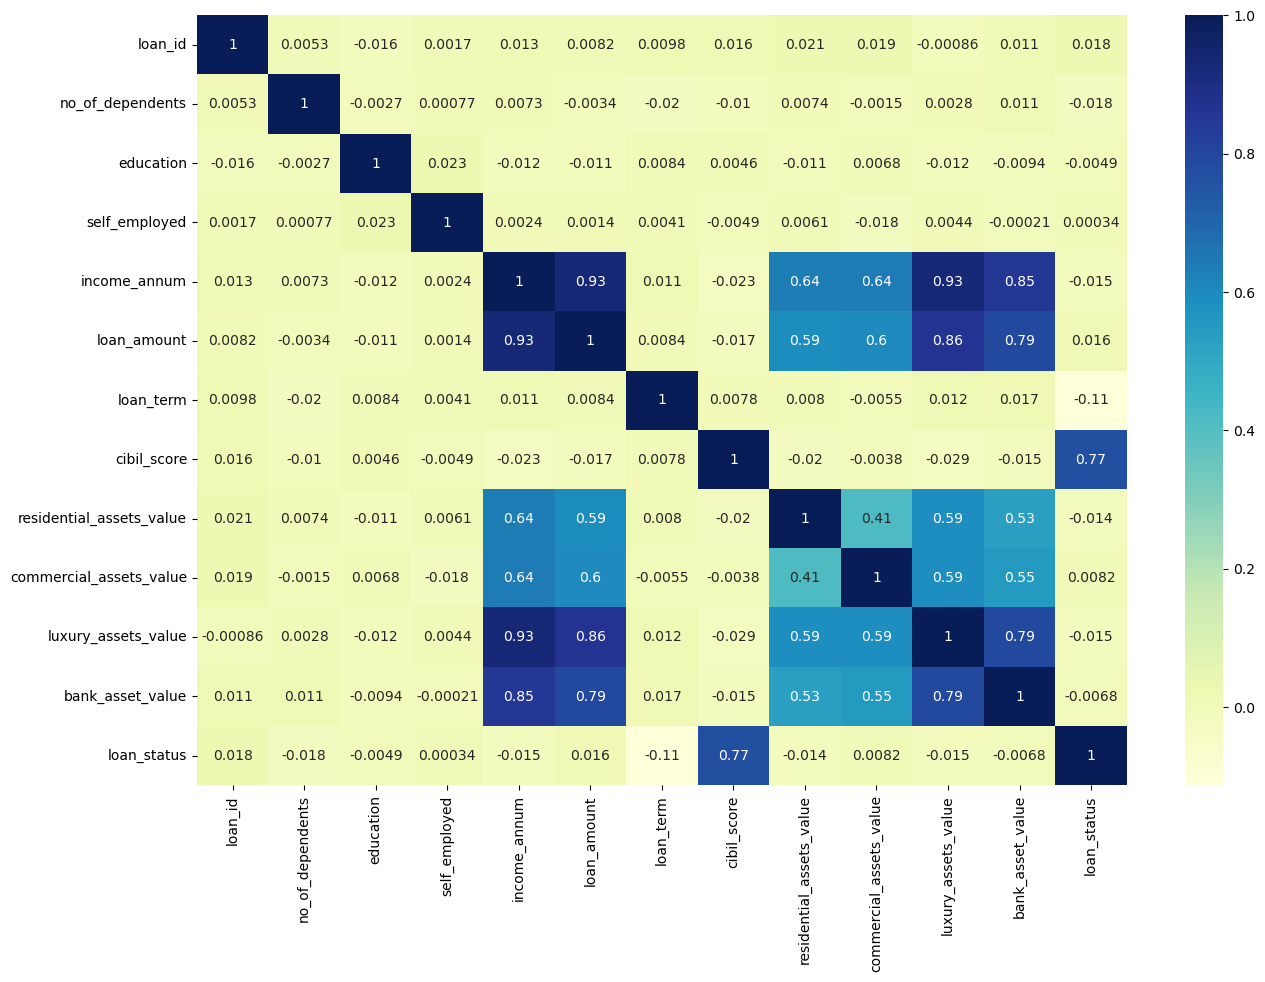

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True,cmap="YlGnBu")

Text(0.5, 1.0, 'Loan Amount vs Income')

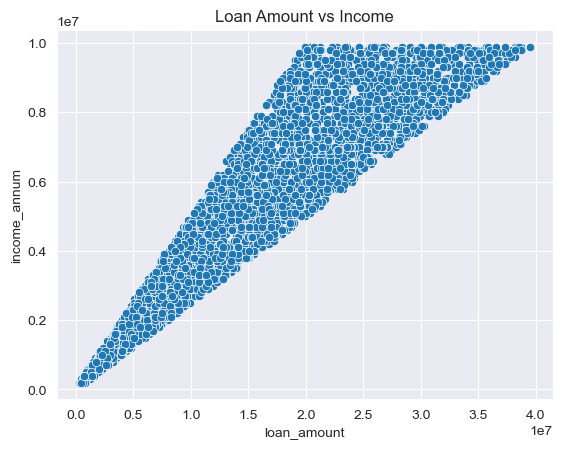

In [27]:
ax = sns.scatterplot(x="loan_amount", y="income_annum", data=df)
ax.set_title("Loan Amount vs Income")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

In [15]:
X=df.drop(columns=['loan_status','loan_id'])
Y=df["loan_status"]

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model=DecisionTreeClassifier(max_depth=3,random_state=0,criterion="gini")

In [19]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
predictions=model.predict(X_test)

In [21]:
compare=pd.DataFrame({"Actual":Y_test,"Predicted":predictions})
compare

,Actual,Predicted
4001,0,0
1637,0,0
1317,1,1
758,0,0
2349,0,0
...,...,...
1067,1,0
529,1,1
340,0,0
941,1,1


In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       469
           1       0.99      0.95      0.97       812

    accuracy                           0.96      1281
   macro avg       0.95      0.97      0.96      1281
weighted avg       0.97      0.96      0.96      1281



<Axes: xlabel='loan_status', ylabel='count'>

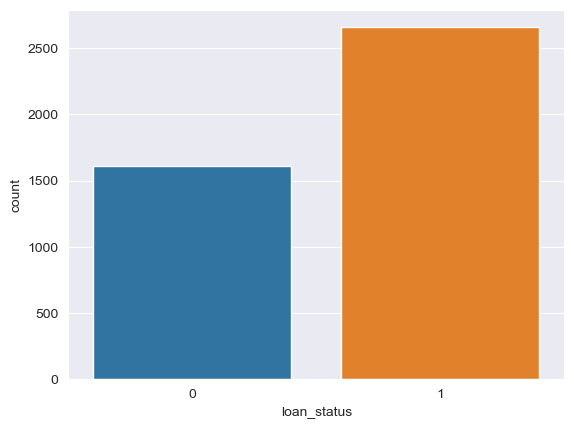

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='loan_status', data=df)

In [25]:
dfcol=df.drop(columns=['loan_status','loan_id'])
tree_rules = export_text(model, feature_names=list(dfcol))
print(tree_rules)

|--- cibil_score <= 549.50
|   |--- loan_term <= 5.00
|   |   |--- loan_amount <= 26250000.00
|   |   |   |--- class: 0
|   |   |--- loan_amount >  26250000.00
|   |   |   |--- class: 1
|   |--- loan_term >  5.00
|   |   |--- class: 0
|--- cibil_score >  549.50
|   |--- residential_assets_value <= 50000.00
|   |   |--- loan_amount <= 600000.00
|   |   |   |--- class: 0
|   |   |--- loan_amount >  600000.00
|   |   |   |--- class: 1
|   |--- residential_assets_value >  50000.00
|   |   |--- residential_assets_value <= 550000.00
|   |   |   |--- class: 1
|   |   |--- residential_assets_value >  550000.00
|   |   |   |--- class: 1

